# Verification of Champ_Fonc_Fonction_txyz_Morceaux

In [1]:
from trustutils import run

run.introduction("Pierre Ledac")

## Introduction 
 Validation made by : Pierre Ledac



 Report generated 26/01/2022

### Description

Define a time and spatial dependent boundary condition by reading fields from a MED file. 

In this test case (flow in a 3D channel), inlet boundary condition on velocity is concerned. 

Champ front MED and Champ Fonc MED Tabule are the keywords to use for such a task. 

See below in the data file the syntax.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/Champ_front_MED/build)

In [3]:
from trustutils import run 
c1 = run.addCase(".","base.data") 
run.printCases()
run.runCases()

### Test cases 
* ./base.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 4.0s.


## Champ_front_MED time-dependence verification

### Inlet velocity evolution at (x,y,z)=(0.0,0.5,0.5)

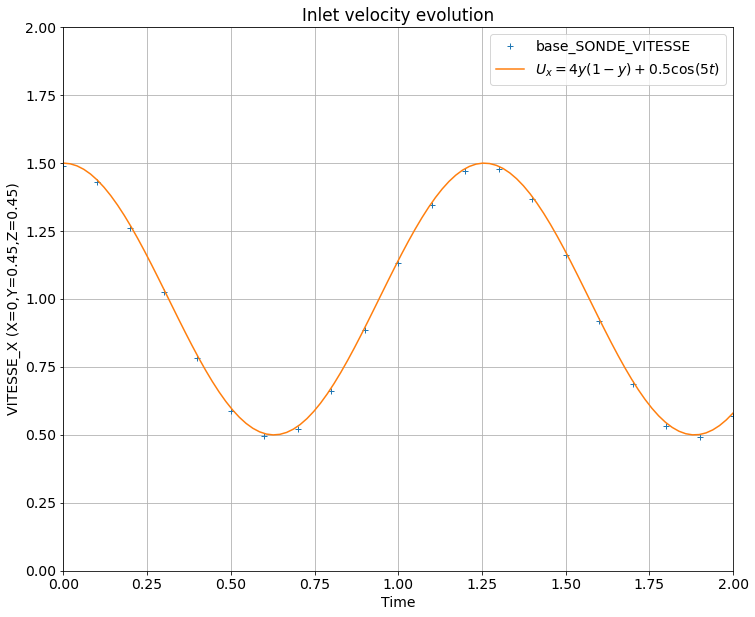

In [4]:
from trustutils import plot
import matplotlib.pyplot as plt
import numpy as np
import math

a = plot.Graph("Inlet velocity evolution")
a.addPoint('base_SONDE_VITESSE.son',marker='+')

x_son = 0.
y_son = 0.5

x=np.linspace(0,2,100)
y = list(map(lambda a: 4.*y_son*(1.-y_son)+0.5*math.cos(5.*a),x))
a.add(x,y,label=r"$U_x = 4y(1-y)+0.5\cos(5t)$")

a.visu(0,2,0,2)

## Champ_front_MED space-dependence verification

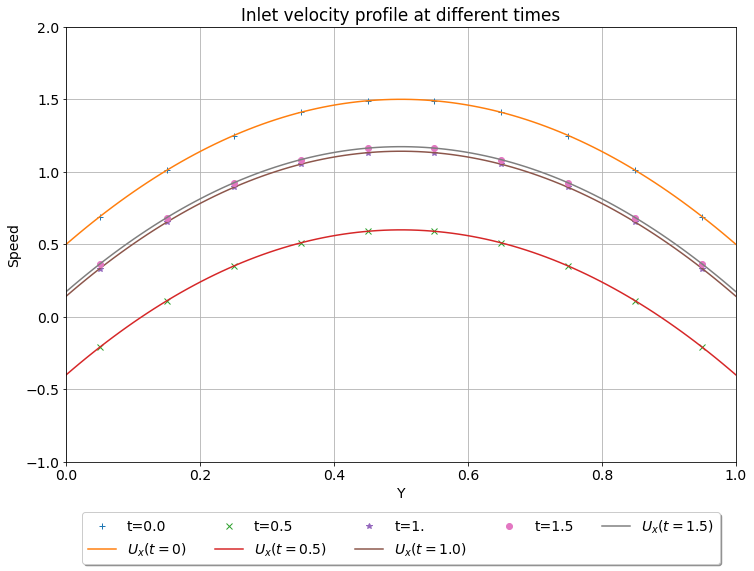

In [5]:
a = plot.Graph("Inlet velocity profile at different times",size=[12,8])

t = 0.
v = plot.loadText("base_INLET.coupe.0.00000000e+00")
a.add(v[0],v[1],label="t=0.0",marker="+")
x=np.linspace(0,1,100)
y = list(map(lambda a: 4.*a*(1.-a)+0.5*math.cos(5.*t),x))
a.add(x,y,label=r"$U_x(t=0)$")

t = 0.5
v = plot.loadText("base_INLET.coupe.5.00000000e-01")
a.add(v[0],v[1],label="t=0.5",marker="x")
y = list(map(lambda a: 4.*a*(1.-a)+0.5*math.cos(5.*t),x))
a.add(x,y,label=r"$U_x(t=0.5)$")

t = 1.
v = plot.loadText("base_INLET.coupe.1.00000000e+00")
a.add(v[0],v[1],label="t=1.",marker="*")
y = list(map(lambda a: 4.*a*(1.-a)+0.5*math.cos(5.*t),x))
a.add(x,y,label=r"$U_x(t=1.0)$")

t = 1.5
v = plot.loadText("base_INLET.coupe.1.50000000e+00")
a.add(v[0],v[1],label="t=1.5",marker="o")
y = list(map(lambda a: 4.*a*(1.-a)+0.5*math.cos(5.*t),x))
a.add(x,y,label=r"$U_x(t=1.5)$")

a.label("Y","Speed")
a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
a.visu(0,1,-1,2)

## Data Files

In [6]:
c1.dumpDataset() 

 # PARALLEL OK #
 dimension 3
 Pb_Hydraulique pb
 Domaine dom
 # BEGIN MESH #
 Lire_MED dom dom mesh.med
 # END MESH #
 # BEGIN PARTITION
 Partition dom
 {
     Partition_tool tranche { tranches 1 1 2 }
     Larg_joint 1
     zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 option_vdf { P_imposee_aux_faces oui }
 VDF dis
 Schema_euler_implicite sch
 Read sch
 {
     nb_pas_dt_max 100
     tinit 0
     dt_max 0.1
     tmax 2
     facsec 100
     solveur implicite { seuil_convergence_solveur 1.e-8 }
 }
 Fluide_Incompressible fluide
 Read fluide
 {
     mu Champ_Uniforme 1 3.7e-05
     rho Champ_Uniforme 1 1.0
 }
 Associate pb dom
 Associate pb sch
 Associate pb fluide
 Discretize pb dis
 Read pb
 {
     Navier_Stokes_standard
     {
         solveur_pression petsc cholesky { }
         convection { Amont }
         diffusion { }
         initial_conditions { vitesse Champ_Uniforme 3 0. 0. 0. }
         boundary_conditions {
             Wa